**Rationale** In this assignment, you will practice specifying, running, and interpreting regressions involving non-linear functional forms and heterogeneous effects. You will be using the datasets located [here](https://drive.google.com/drive/folders/1SRMp4QhyXxfjOiR_CnbNQ1zMI1AuCjyp?usp=sharing).

1. Avocado dataset
1. Starbucks campaign data

In [2]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at drive


In [3]:
fpath = 'drive/MyDrive/Customer Data Analysis/' # change to your data folder
os.listdir(fpath)

['MyNotes Mod1.ipynb',
 'A1 Treasure Love_Part1.ipynb',
 'A1_Part2.ipynb',
 'MyNotes_Mod2.ipynb',
 'A2 Programming Fundamentals.ipynb',
 'stores A data-set.csv',
 'stores data-set.csv',
 'stores B data-set.csv',
 'stores C data-set.csv',
 'sales data-set.csv',
 '9-8_notes2.ipynb',
 'Colab Notebooks',
 'quebec_yelp_reviews.csv',
 'quebec_biz.csv',
 'Quebec_dataset.csv',
 '9-8_notes.ipynb',
 'A3.ipynb',
 'Copy of InClass_Module_3.ipynb',
 'telecom_churn.csv',
 'renttherunway_final_data.json',
 'A4.ipynb',
 'Notes_Sept15.ipynb',
 '9 22_Notes.ipynb',
 '9-29_notes.ipynb',
 'facebook_ads.csv',
 'starbucks_promos.csv',
 'A4 F2021 - Visualization.ipynb',
 'A5.ipynb',
 '10 13_notes.ipynb',
 'temple_traffic.csv',
 'avocado.csv',
 'Untitled0.ipynb',
 'A7 F2021 Regression 2.ipynb']

# Problem 1 (5 points) Avocado prices redux 

**Only use data for conventional types and remove the data for the region TotalUS**

First, write a loop through each unique region to plot the 
1. total volume vs. average price
1. total volume vs. average price$^2$
1. ln(Total Volume) vs average price
1. Total volume vs. ln(Average Price)
1. ln(Total Volume) vs ln(Average Price)

For each of the above 5 plots, the syntax should look something like:
```
for r in df.region.unique():
    temp = df[df.region==r]
    plt.scatter(....) # fill this in
```

1. Which of the plots of the relationship between price and demand looks most "linear?"

Using the avocado dataset, estimate the following demand models while accounting for the region effects (incl region in the regression):

1. level - level
1. level - Quadratic
1. level - log
1. log - level
1. log - log

Answer the following:
1. Succinctly interpret the **price coefficient** for each model (pay attention to corresponding p-values as well). 
1. Based on the log-log model, is the demand for avocados price elastic or inelastic? What does this mean?

In [4]:
# read in the dataset and replace column name spaces with underscores
avocado = pd.read_csv(fpath + 'avocado.csv', index_col = 0)
avocado.columns = [c.replace(' ', '_') for c in avocado.columns]

In [5]:
# select regions that are not TotalUS e.g. region != 'TotalUS' and only conventional types

avocado.head(5)


,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# check the unique regions to make sure TotalUS is not in the region column
avocado = avocado.loc[(avocado.region != 'TotalUS')&(avocado.type=='conventional')]

In [7]:
# check the unique types to make sure there are only conventional types
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
# write a loop to plot average price vs total volume and color each region differently
# e.g.:
# for r in avocado.region.unique():
#     temp = avocado.loc[avocado.region == r]
#     plt.scatter(..., ..., s= 1) # <- change this, make sure price is on the x-axis

avocado.type.unique()

array(['conventional'], dtype=object)

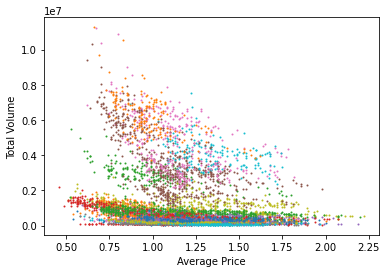

In [9]:
# do the same, but now plot AveragePrice^2 vs Total_Volume
for r in avocado.region.unique():
  df = avocado.loc[avocado.region == r]
  plt.scatter(df.AveragePrice, df.Total_Volume, s=1)
  plt.xlabel('Average Price')
  plt.ylabel('Total Volume')

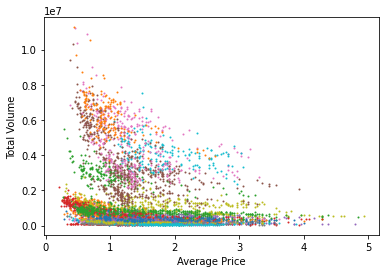

In [10]:

# do the same, but now plot ln(average price) vs. total volume
# remember np.log() takes the log

for r in avocado.region.unique():
  df = avocado.loc[avocado.region == r]
  plt.scatter(df.AveragePrice**2, df.Total_Volume, s=1)
  plt.xlabel('Average Price')
  plt.ylabel('Total Volume')

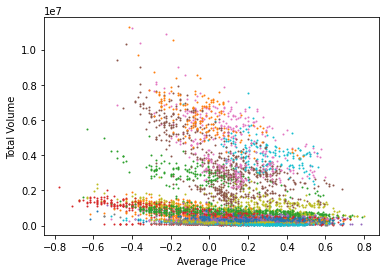

In [11]:
# do the same, but now plot AveragePrice vs ln(Total_Volume)
for r in avocado.region.unique():
  df = avocado.loc[avocado.region == r]
  plt.scatter(np.log(df.AveragePrice), df.Total_Volume, s=1)
  plt.xlabel('Average Price')
  plt.ylabel('Total Volume')

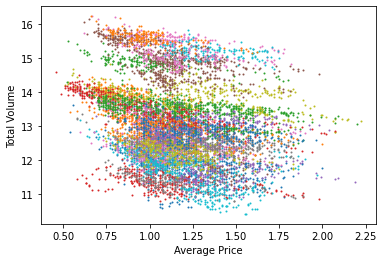

In [12]:
# do the same, but now plot ln(AveragePrice) vs ln(Total_Volume)

for r in avocado.region.unique():
  df = avocado.loc[avocado.region == r]
  plt.scatter(df.AveragePrice, np.log(df.Total_Volume), s=1)
  plt.xlabel('Average Price')
  plt.ylabel('Total Volume')

**EDIT THIS CELL**

Which plot seems to exhibit the most linear relationship within each region? (i.e. dots of the same color seem to form closest to a straight line).

The plot that seems to exhibit the most linear relationship, is the ___________________ vs. ___________________ plot. This suggests that the ____________________ model may be most appropriate.

(*models can be level-level, quadratic, log-log, level-log, log-level.*)

In [13]:
# run the level-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res = smf.ols('Total_Volume ~ AveragePrice + C(region)', data = avocado).fit()

# print the regression table below

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:48:36   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**Edit this cell**

For the level-level regression, explain the coefficient for the price variable:

1. Answer here: **for every 1 unit change in y is a -5.767 decrease in average price**

In [14]:
# run the quadratic regression of Total Volume on Average Price and Average Price ^2
# while accounting for regions as an additional explanatory variable.
res= smf.ols('Total_Volume ~ AveragePrice**2 + C(region)', data = avocado).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:48:36   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**Edit this cell**

For the quadratic regression, explain the marginal effect of price (1 unit change in price leads to...) for the quadratic regression. Remember, you must consider that when price changes, so does price$^2$:

1. Answer here: **1 unit change in price the marginal effect of price is doubled**

In [15]:
# run the log-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res = smf.ols('np.log(Total_Volume) ~ AveragePrice + C(region)', data = avocado).fit()

# print the regression table below
print(res.summary())


                             OLS Regression Results                             
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.975
Model:                              OLS   Adj. R-squared:                  0.975
Method:                   Least Squares   F-statistic:                     6552.
Date:                  Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                          23:48:36   Log-Likelihood:                 2047.2
No. Observations:                  8957   AIC:                            -3986.
Df Residuals:                      8903   BIC:                            -3603.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Edit this cell**

For the log-level regression, explain the coefficient for the price variable:

1. Answer here: **for every increase in x, there's a decrease in -0.5786**



In [16]:
# run the level-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res= smf.ols('Total_Volume ~ np.log(AveragePrice) + C(region)', data = avocado).fit()

# print the regression table below
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3308.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:48:36   Log-Likelihood:            -1.2695e+05
No. Observations:                8957   AIC:                         2.540e+05
Df Residuals:                    8903   BIC:                         2.544e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**Edit this cell**

For the level-log regression, explain the coefficient for the price variable:

1. Answer here: **for every increase in x, there is an -7.48% decrease in y**

In [17]:
# run the log-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res = smf.ols('np.log(Total_Volume) ~ np.log(AveragePrice) + C(region)', data = avocado).fit()

# print the regression table below
print(res.summary())


                             OLS Regression Results                             
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.976
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                     6817.
Date:                  Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                          23:48:36   Log-Likelihood:                 2220.8
No. Observations:                  8957   AIC:                            -4334.
Df Residuals:                      8903   BIC:                            -3950.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Edit this cell**

For the log-log regression, explain the meaning of the coefficient for the price variable:

1. Answer here: **-72.22**

Based on the log-log regression, are avocados price-elastic or inelastic? What does this mean?

1. Answer here: **the are inelastic because the higher the price, increase in price, decrease in total revenue**



# Problem 2 (5 points)

Use the Starbucks promotions data. Filter the data to use only the rows satisfying all of the following conditions:

1. Transaction amount more than 0 and less than 50.
1. Income is not missing (df.income.notnull())

We suspect the average transaction value might be higher for individuals with higher incomes. We also suspect that the higher the offer difficulty (min. amount spend needed to redeem), the higher the spend. However, this effect might be different depending on income. Additionally, the offer type (buy one get one vs. discount) may impact the transaction amount. Moreover, this effect of the offer type may differ depending on income.

1. To capture all of these potential effects, run the following regression: 
$$
ln(\text{Trans Amt}) = \beta_0 + \beta_1 ln(\text{Inc}) + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer} + \beta_4 ln(\text{Inc})\times \text{difficulty} + \beta_5  ln(\text{Inc})\times \text{Disc Offer}+ e
$$

1. Succinctly interpret the regression results.

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the $\beta's$ in the equation above, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately ____**1.3139**____% change in transaction amount. 
1. In terms of the $\beta's$ in the equation above, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to approximately _____**0.9995**___% change in transaction amount. 

**Remember** the solution here is not as simple as looking at a single coefficient. The effect of income depends on offer type and difficulty.

Note, you can re-write the equation as:
$$
ln(\text{Trans Amt}) = \beta_0  + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer}  + \big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big] \times ln(\text{Inc})+ e
$$

Where the entire effect of $ln(income)$ on $ln(TransactionAmount)$ is captured by the expression $\big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big]$.

In [31]:
sb = pd.read_csv(fpath + 'starbucks_promos.csv', index_col=0) # read the starbucks data

In [32]:
# select rows with transactions >0 but <50 and income is not missing
# replace sb with the result of the selection

sb.loc[(sb.transaction_amount>0)&(sb.transaction_amount<50)&(sb.income.notnull())]



,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1
11,0091d2b6a5ea4defaa8393e4e816db60,offer received,0,F,62,20160617,81000.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,"['web', 'email', 'mobile', 'social']",10.0,120.0,bogo,0.0,18.26,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76266,ffdefcac307f4ca99ac1ebd51470f106,offer received,576,F,87,20170315,47000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,576.0,10.78,690.0,1
76268,ffeaa02452ef451082a0361c3ca62ef5,offer received,576,F,67,20170219,77000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,576.0,20.00,612.0,1
76271,fff29fb549084123bd046dbc5ceb4faa,offer received,576,F,59,20170831,93000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,576.0,39.59,684.0,1
76275,fffad4f4828548d1b5583907f2e9906b,offer received,576,M,34,20170123,34000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,576.0,10.98,588.0,1


In [34]:
# run the regression here, store the result as the variable res

res = smf.ols('np.log(transaction_amount) ~ difficulty + np.log(income)+C(offer_type) + np.log(income)*difficulty + np.log(income)*C(offer_type)', data = sb).fit()

In [35]:
# print the result summary here, e.g. print(res.summary()):

print(res.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(transaction_amount)   R-squared:                       0.327
Model:                                    OLS   Adj. R-squared:                  0.327
Method:                         Least Squares   F-statistic:                     3018.
Date:                        Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                                00:14:04   Log-Likelihood:                -26101.
No. Observations:                       31026   AIC:                         5.221e+04
Df Residuals:                           31020   BIC:                         5.226e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the the estimated coefficients, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately 131.39% **increase** in transaction amount. 
1. In terms of the estimated coefficients, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to ___99.95_____% **increase** in transaction amount. 

**Basically,** substitute the $\beta's$ from the answer above with the estimated coefficients.